# Cellular automata
细胞自动机（CA）是一个世界的模型，带有非常简单的物理。 “细胞”的意思是世界被分成一个大口袋，称为细胞。 “自动机”是一台执行计算的机器 - 它可能是一台真机。 ，但更多时候，“机器”是数学抽象或计算机的模拟。


Code examples from [Think Complexity, 2nd edition](https://thinkcomplex.com).

Copyright 2016 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/AllenDowney/ThinkComplexity2/raw/master/notebooks/utils.py')

In [4]:
from utils import savefig
# make a directory for figures
!mkdir -p figs

## Zero-dimensional CA

Here's a simple implementation of the 0-D CA I mentioned in the book, with one cell.

In [5]:
n = 10
x = np.zeros(n)
print(x)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


To get the state of the cell in the next time step, we increment the current state mod 2.
选择最小的感兴趣的状态数 2，和另一个简单的规则xi = (x[i-1] + 1) % 2，其中%是余数（或模）运算符。

这个 CA 的行为很简单：闪烁。 也就是说，在每个时间步之后，细胞的状态在 0 和 1 之间切换。

大多数 CA 是确定性的，这意味着规则没有任何随机元素；给定相同的初始状态，它们总是产生相同的结果。 也有不确定性的 CA，但我不会在这里涉及它们。

In [6]:
x[1] = (x[0] + 1) % 2
x[1]

1.0

Filling in the rest of the array.

In [7]:
for i in range(2, n):
    x[i] = (x[i-1] + 1) % 2
    
print(x)

[0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]


So the behavior of this CA is simple: it blinks.

## One-dimensional CA

Just as we used a 1-D array to show the state of a single cell over time, we'll use a 2-D array to show the state of a 1-D CA over time, with one column per cell and one row per timestep.
正如我们使用一维数组来显示单个单元格随时间的状态一样，我们将使用二维数组来显示一维 CA 随时间的状态，每个单元格一列和一行每个时间步长。

首先，我在第一行的中间，创建带有单个 1 的零数组。

In [8]:
rows = 5
cols = 11
array = np.zeros((rows, cols), dtype=np.uint8)
array[0, 5] = 1
print(array)

[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]


To plot the array I use `plt.imshow`
plot_ca用图形展示了结果。
按照约定，我使用缩写名称plt引入了pyplot。 imshow将数组视为“图像”并显示它。 使用颜色表'Blues'，将“开”细胞绘制为深蓝色，“关”细胞绘制为淡蓝色。

In [9]:
def plot_ca(array):
    plt.imshow(array, cmap='Blues', interpolation='none')

Here's what it looks like after we initialize the first row.
这是我们初始化第一行后的样子。

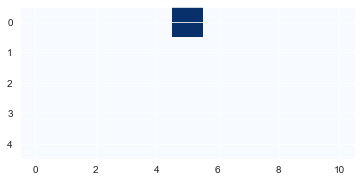

In [10]:
plot_ca(array)

And here's the function that fills in the next row.  The rule for this CA is to take the sum of a cell and its two neighbors mod 2.
现在，为了计算下一个时间步中的 CA 状态，我们可以使用step：



In [11]:
def step(array, i):
    """Compute row i of a CA.
    """
    rows, cols = array.shape
    row = array[i-1]
    for j in range(1, cols):
        elts = row[j-1:j+2]
        array[i, j] = sum(elts) % 2
        #取三个元素，求和取余放到下一行

Here's the second row.

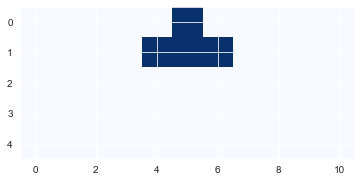

In [12]:
step(array, 1)
plot_ca(array)

And here's what it looks like with the rest of the cells filled in.

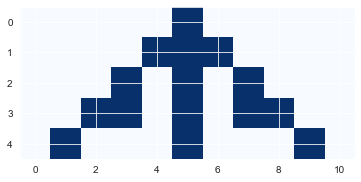

In [13]:
for i in range(1, rows):
    step(array, i)

plot_ca(array)

For a simple set of rules, the behavior is more interesting than you might expect.
对于一组简单的规则，其行为比您预期的更有趣。

**Exercise:** Modify this code to increase the number of rows and columns and see what this CA does after more time steps.
修改此代码以增加行数和列数，并在更多时间步之后查看此 CA 的作用。

## Cross correlation

We can update the CA more quickly using "cross correlation".  The cross correlation of an array, `a`, with a window, `w`, is a new array, `c`, where element `k` is:

$ c_k = \sum_{n=0}^{N-1} a_{n+k} \cdot w_n $

w是卷积里面的Window，a是规则，
In Python, we can compute element `k` like this:
上一节中的操作——从数组中选择元素并将它们相加——是一个在许多领域中非常有用的操作示例，它有一个名称：互相关。 NumPy 提供了一个名为 correlate 的函数来计算它。在本节中，我将展示如何使用 NumPy 编写更简单、更快的 step 版本。


NumPy correlate 函数接受一个数组 a 和一个长度为 N 的“窗口” w 并计算一个新数组 c，其中元素 k 是以下总和：

In [14]:
def c_k(a, w, k):
    """Compute element k of the cross correlation of a and w.
    """
    #N是窗口长度
    N = len(w)
    return sum(a[k:k+N] * w)

To see how this works, I'll create an array:
此函数计算 a 和 w 之间相关性的元素 k。为了展示它是如何工作的，我将创建一个整数数组：

In [15]:
N = 10
row = np.arange(N, dtype=np.uint8)
print(row)

[0 1 2 3 4 5 6 7 8 9]


And a window:

In [16]:
window = [1, 1, 1]

print(window)

[1, 1, 1]


With this window, each element of `c` is the sum of three neighbors in the array:
在这个窗口中，`c` 的每个元素都是数组中三个相邻元素的总和：

In [17]:
c_k(row, window, 0)

3

In [18]:
c_k(row, window, 6  )

21

The following function computes the elements of `c` for all values of `k` where the window can overlap with the array:
我们可以使用 c_k 来编写 correlate，它为窗口和数组重叠的所有 k 值计算 c 的元素。

In [19]:
def correlate(row, window):
    """Compute the cross correlation of a and w.
    """
    cols = len(row)
    N = len(window)
    c = [c_k(row, window, k) for k in range(cols-N+1)]
    return np.array(c)

In [20]:
c = correlate(row, window)
print(c)

[ 3  6  9 12 15 18 21 24]


This operation is useful in many domains, so libraries like NumPy usually provide an implementation.  Here's the version from NumPy.
这个操作在很多领域都很有用，所以像 NumPy 这样的库通常会提供一个实现。这是 NumPy 的版本。
mode = valid是不补0的
mode = same是补0的

In [21]:
c = np.correlate(row, window, mode='valid')
print(c)

[ 3  6  9 12 15 18 21 24]


With `mode='valid'`, the NumPy version does the same thing as mine: it only computes the elements of `c` where the window overlaps with the array.  A drawback of this mode is that the result is smaller than `array`.

And alternative is `mode='same'`, which makes the result the same size as `array` by extending array with zeros on both sides.  Here's the result:
使用 `mode='valid'`，NumPy 版本和我的一样：它只计算 `c` 中窗口与数组重叠的元素。这种模式的一个缺点是结果小于 `array`。

另一种方法是 `mode='same'`，它通过在两边都用零扩展数组来使结果与 `array` 大小相同。结果如下：

In [22]:
c = np.correlate(row, window, mode='same')
print(row)
print(window)
print(c)

[0 1 2 3 4 5 6 7 8 9]
[1, 1, 1]
[ 1  3  6  9 12 15 18 21 24 17]


**Exercise:** Write a version of `correlate` that returns the same result as `np.correlate` with `mode='same'.`

In [23]:
# Hint: use np.pad to add zeros at the beginning and end of `row`

np.pad(row, 1, 'constant')

array([0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0], dtype=uint8)

In [24]:
# Solution

def correlate_same(row, window):
    """Compute the cross correlation of a and w.
    """
    cols = len(row)
    N = len(window)
    padded = np.pad(row, 1, 'constant')
    c = [c_k(padded, window, k) for k in range(cols)]
    return np.array(c)

c = correlate_same(row, window)
print(c)

[ 1  3  6  9 12 15 18 21 24 17]


## Update with correlate

Now we can use `np.correlate` to update the array.  I'll start again with an array that contains one column for each cell and one row for each time step, and I'll initialize the first row with a single "on" cell in the middle:
现在我们可以使用 np.correlate 来更新数组。我将从一个数组开始，其中每个单元格包含一列，每个时间步长包含一行，我将在中间使用单个“on”单元格初始化第一行：

以下窗口选择前三个元素：

In [25]:
window = np.zeros(cols, dtype=np.int8)
window[:3] = 1
print(window)


[1 1 1 0 0 0 0 0 0 0 0]


如果我们乘以数组的最后一行，我们会得到前三个元素：

In [26]:
# print(array)
print(array[4])
print(window * array[4])

[0 1 0 0 0 1 0 0 0 1 0]
[0 1 0 0 0 0 0 0 0 0 0]


现在我们可以使用sum和模运算符来计算下一行的第一个元素：
原理:如果数字是偶数，则数字的奇偶性为 0；如果数字为奇数，则奇偶性为 1。

In [27]:
sum(window * array[4]) % 2

1

In [28]:
rows = 5
cols = 11
array = np.zeros((rows, cols), dtype=np.uint8)
array[0, 5] = 1
print(array)

[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]


Now here's a version of `step` that uses `np.correlate`
现在结果与数组大小相同。作为本章末尾的一个练习，你将有机会编写一个做同样事情的 correlate 版本。

我们可以使用 NumPy 的 correlate 实现来编写一个简单、快速的版本

In [29]:
def step2(array, i, window=[1,1,1]):
    """Compute row i of a CA.
    """
    row = array[i-1]
    c = np.correlate(row, window, mode='same')
    array[i] = c % 2
    #array和Window卷 放到下一行，由于只能显示0和1所以要取余

And the result is the same.

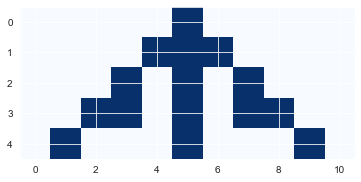

In [30]:
for i in range(1, rows):
    step2(array, i)

plot_ca(array)

## CA Tables 第三种方法

What we have so far is good enough for a CA that only depends on the total number of "on" cells, but for more general CAs, we need a table that maps from the configuration of the neighborhood to the future state of the center cell.

The following function makes the table by interpreting the Rule number in binary.
到目前为止，我们所拥有的对于仅依赖于“on”单元总数的 CA 来说已经足够了，但是对于更一般的 CA，我们需要一个从邻域的配置映射到中心单元的未来状态的表.
以下函数通过以二进制解释规则编号来制作表格。

In [31]:
def make_table(rule):
    """Make the table for a given CA rule.
    
    rule: int 0-255
    
    returns: array of 8 0s and 1s
    """
    rule = np.array([rule], dtype=np.uint8)
    table = np.unpackbits(rule)[::-1]
    return table

Here's what it looks like as an array:
参数 rule 是 0 到 255 之间的整数。第一行将 rule 放入一个包含单个元素的数组中，因此我们可以使用 unpackbits，它将规则编号转换为其二进制表示。例如，这是规则 150 的表格：

In [61]:
table = make_table(150)
print(table)

[0 1 1 0 1 0 0 1]


If we correlate the row with the window `[4, 2, 1]`, it treats each neighborhood as a binary number between 000 and 111.
mode参数决定结果的大小。 你可以阅读 NumPy 文档中的详细信息，但是当模式为'same'时，结果与输入大小相同。



In [33]:
window = [4, 2, 1]
c = np.correlate(array[0], window, mode='same')
print(array[0])

print(c)

[0 0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 1 2 4 0 0 0 0]


Now we can use the result from `np.correlate` as an index into the table; the result is the next row of the array.

In [34]:
array[1] = table[c]
print(array[1])

[0 0 0 0 1 1 1 0 0 0 0]


We can wrap up that code in a function:

In [35]:
def step3(array, i, window=[4,2,1]):
    """Compute row i of a CA.
    """
    row = array[i-1]
    c = np.correlate(row, window, mode='same')
    array[i] = table[c]

And test it again.

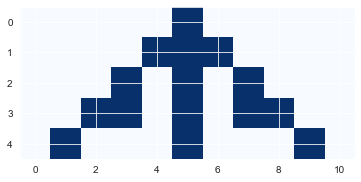

In [36]:
for i in range(1, rows):
    step3(array, i)

plot_ca(array)

How did I know that Rule 150 is the same as the previous CA?  I wrote out the table and converted it to binary.

## The Cell1D object

`Cell1D` encapsulates the code from the previous section.
Cell1D 封装了上一节中的代码。

In [37]:
class Cell1D:
    """Represents a 1-D a cellular automaton"""

    def __init__(self, rule, n, m=None):
        """Initializes the CA.

        rule: integer
        n: number of rows
        m: number of columns

        Attributes:
        table:  rule dictionary that maps from triple to next state.
        array:  the numpy array that contains the data.
        next:   the index of the next empty row.
        """
        self.table = make_table(rule)
        self.n = n
        self.m = 2*n + 1 if m is None else m

        self.array = np.zeros((n, self.m), dtype=np.int8)
        self.next = 0

    def start_single(self):
        """Starts with one cell in the middle of the top row."""
        self.array[0, self.m//2] = 1
        self.next += 1

    def start_random(self):
        """Start with random values in the top row."""
        self.array[0] = np.random.randint(2, size=self.m)
        self.next += 1

    def start_string(self, s):
        """Start with values from a string of 1s and 0s."""
        # TODO: Check string length
        self.array[0] = np.array([int(x) for x in s])
        self.next += 1

    def loop(self, steps=1):
        """Executes the given number of time steps."""
        for i in range(steps):
            self.step()

    def step(self):
        """Executes one time step by computing the next row of the array."""
        a = self.array
        i = self.next
        window = [4, 2, 1]
        c = np.correlate(a[i-1], window, mode='same')
        a[i] = self.table[c]
        self.next += 1

    def draw(self, start=0, end=None):
        """Draws the CA using pyplot.imshow.

        start: index of the first column to be shown
        end: index of the last column to be shown
        """
        a = self.array[:, start:end]
        plt.imshow(a, cmap='Blues', alpha=0.7)
        
        # turn off axis tick marks
        plt.xticks([])
        plt.yticks([])

The following function makes and draws a CA.

In [38]:
def draw_ca(rule, n=32):
    """Makes and draw a 1D CA with a given rule.
    
    rule: int rule number
    n: number of rows
    """
    ca = Cell1D(rule, n)
    ca.start_single()
    ca.loop(n-1)
    ca.draw()

Here's an example that runs a Rule 50 CA for 10 steps.

Saving figure to file figs/chap05-1


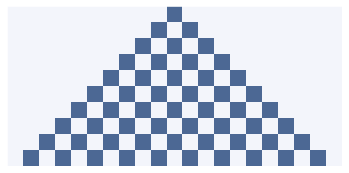

In [39]:
draw_ca(rule=50, n=10)
savefig('figs/chap05-1')

Another example:

Saving figure to file figs/chap05-2


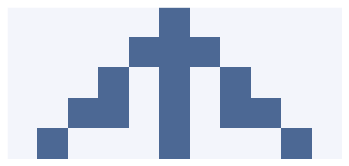

In [40]:
draw_ca(rule=150, n=5)

savefig('figs/chap05-2')

And one more example showing recursive structure.

Saving figure to file figs/chap05-3


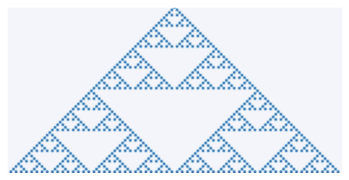

In [41]:
draw_ca(rule=18, n=64)

savefig('figs/chap05-3')

Rule 30 generates a sequence of bits that is indistinguishable from random:

Saving figure to file figs/chap05-4


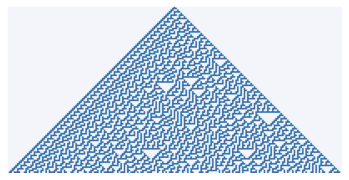

In [42]:
draw_ca(rule=30, n=100)

savefig('figs/chap05-4')

And Rule 110 is Turing complete!

Saving figure to file figs/chap05-5


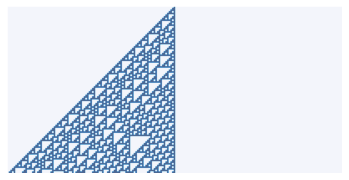

In [43]:
draw_ca(rule=110, n=100)

savefig('figs/chap05-5')

Here's a longer run that has some spaceships.

Saving figure to file figs/chap05-6


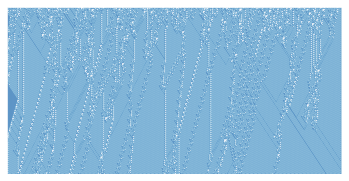

In [44]:
np.random.seed(21)

n = 600
ca = Cell1D(rule=110, n=n)
ca.start_random()
ca.loop(n-1)
ca.draw()

savefig('figs/chap05-6')

## Exercises

**Exercise:** This exercise asks you to experiment with Rule 110 and see how
many spaceships you can find.

1. Read the [Wikipedia page about Rule 110](https://en.wikipedia.org/wiki/Rule_110), which describes its background pattern and spaceships.

2. Create a Rule 110 CA with an initial condition that yields the
  stable background pattern.  Note that the CA class provides
`start_string`, which allow you to initialize the state of
the array using a string of `1`s and `0`s.

3. Modify the initial condition by adding different patterns in the
  center of the row and see which ones yield spaceships.  You might
  want to enumerate all possible patterns of $n$ bits, for some
  reasonable value of $n$.  For each spaceship, can you find the
  period and rate of translation?  What is the biggest spaceship you
  can find?

4. What happens when spaceships collide?

In [45]:
# Solution

# The following function makes a CA with the given rule and 
# runs it for `n` steps.
#探索rule=110
def run_ca(init, n=None, rule=110):
    m = len(init)
    n = m if n is None else n
    
    ca = Cell1D(rule, n, m)
    ca.start_string(init)
    ca.loop(n-1)
    return ca

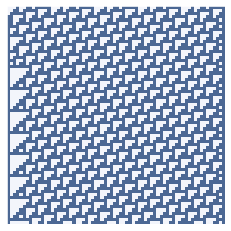

In [46]:
# Solution

# Here's the background pattern.  
# Notice that this implementation doesn't get the borders quite right.
## 这是背景图案。
# 请注意，此实现并没有完全正确地设置边框。
#第一行的五分之一的数为
background = '00010011011111'
# x️ 5
ca = run_ca(background * 5)
ca.draw()

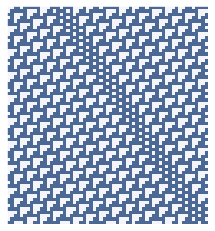

In [47]:
# Solution
#都是通过rule 110来进行反演
# Here's a spaceship that translates right.  
# The parameters to `draw` trim off the borders.

ship1 = '0001110111'

ca = run_ca(background + ship1 + background * 3)
ca.draw(start=4, end=-1)

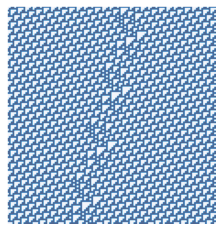

In [48]:
# Solution

# Here's one that translates left:

ship2 = '1001111'

ca = run_ca(background * 5 + ship2 + background * 3)
ca.draw(start=4, end=-1)

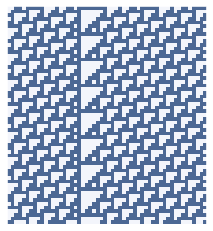

In [49]:
# Solution

# And here's one that stands still.

ship3 = '111'

ca = run_ca(background * 2 + ship3 + background * 2)
ca.draw(start=4, end=-1)

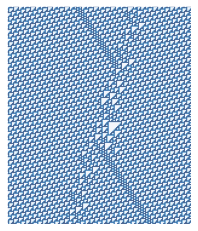

In [50]:
# Solution

# When these two ships collide, they pass through each other:

init = background*4 + ship1 + background*3 + ship2 + background*3

ca = run_ca(init, n=180)
ca.draw(start=4, end=-1)

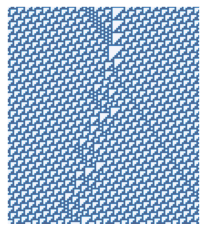

In [51]:
# Solution

# When `ship1` hits `ship3`, it creates one `ship2` and 
# one other spaceship we have not seen.

init = background*3 + ship1 + background + ship3 + background*3

ca = run_ca(init, n=120)
ca.draw(start=4, end=-1)

**Exercise:** The goal of this exercise is to implement a Turing machine.

1. Read about Turing machines at http://en.wikipedia.org/wiki/Turing_machine.

2. Write a class called `Turing` that implements a Turing machine.  For the action table, use the rules for a 3-state busy beaver.

3. Write a `draw` method that plots the state of the tape and the position and state of the head.  For one example of what that might look like, see http://mathworld.wolfram.com/TuringMachine.html.

In [52]:
# Solution

class Turing(Cell1D):
    """Represents a 1-D Turing machine."""

    def __init__(self, table, n, m=None):
        """Initializes the CA.

        tape: map from 
        n: number of rows
        m: number of columns

        Attributes:
        table:  rule dictionary that maps from triple to next state.
        array:  the numpy array that contains the data.
        next:   the index of the next empty row.
        """
        self.n = n
        self.m = n if m is None else m
        
        self.tape = np.zeros((n, self.m), dtype=np.uint8)
        self.head = np.zeros(n, dtype=np.int64)
        self.head[0] = m//2
        self.state = 'A'
        self.table = table
        self.next = 1

    def loop(self, steps=1):
        """Executes the given number of time steps."""
        for i in range(steps):
            try:
                self.step()
            except StopIteration:
                break

    def step(self):
        """Executes one time step."""
        if self.state == 'HALT':
            raise StopIteration
            
        a = self.tape
        i = self.next
        a[i] = a[i-1]
        head = self.head[i-1]
        symbol = a[i-1, head]
        print(symbol, self.state, end=': ')
        new_symbol, move, self.state = self.table[symbol, self.state]
        print(new_symbol, move, self.state)
        
        a[i, head] = new_symbol
        if move == 'R':
            head += 1
        else:
            head -= 1
        self.head[i] = head
        self.next += 1
        
    def draw(self, start=0, end=None):
        """Draws the CA using pyplot.pcolor.
        
        start: index of the first column to be shown 
        end: index of the last column to be shown
        """
        # draw the cells
        a = self.tape[:, start:end]
        plt.imshow(a, cmap='Blues', alpha=0.4)
        
        # draw the read-write head
        xs = self.head
        ys = np.arange(len(xs))
        plt.plot(xs, ys, 'r.')

In [53]:
# Solution

# Here's the action table for a 3-state busy beaver.

table = {}
table[0, 'A'] = 1, 'R', 'B' 
table[0, 'B'] = 1, 'L', 'A' 
table[0, 'C'] = 1, 'L', 'B'
table[1, 'A'] = 1, 'L', 'C' 
table[1, 'B'] = 1, 'R', 'B' 
table[1, 'C'] = 1, 'R', 'HALT'

In [54]:
# Solution

# Make the Turning machine and run it

n = 15
m = 20
turing = Turing(table, n, m)

turing.loop(n-1)

0 A: 1 R B
0 B: 1 L A
1 A: 1 L C
0 C: 1 L B
0 B: 1 L A
0 A: 1 R B
1 B: 1 R B
1 B: 1 R B
1 B: 1 R B
1 B: 1 R B
0 B: 1 L A
1 A: 1 L C
1 C: 1 R HALT


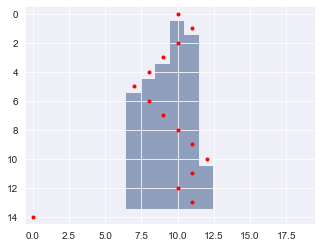

In [55]:
# Solution

# And here's what it looks like.

turing.draw()

**Exercise:** This exercise asks you to implement and test several PRNGs.
For testing, you will need to install 
`DieHarder`, which you can download from 
https://www.phy.duke.edu/~rgb/General/dieharder.php, or it
might be available as a package for your operating system.

1. Write a program that implements one of the linear congruential
generators described at http://en.wikipedia.org/wiki/Linear_congruential_generator}.
Test it using `DieHarder`.

2. Read the documentation of Python's `random` module.
What PRNG does it use?  Test it.

3. Implement a Rule 30 CA with a few hundred cells,
run it for as many time steps as you can in a reasonable amount
of time, and output the center column as a sequence of bits.
Test it.


In [56]:
# Solution

# Here's a start, but this solution is not done.

rule = 30
m = 10001
n = 20000
ca = Cell1D(rule, n, m)
ca.start_single()
%time ca.loop(n-1)

CPU times: user 1.24 s, sys: 35 ms, total: 1.27 s
Wall time: 889 ms


In [57]:
# Solution

# extract the center column

bits = ca.array[:, m//2]
bits

array([1, 1, 0, ..., 1, 1, 1], dtype=int8)

In [58]:
# Solution

# count the number of 0s and 1s

from collections import Counter
Counter(bits)

Counter({1: 10979, 0: 9021})